<a href="https://colab.research.google.com/github/Vikhyath-Shetty/Noise-Reduction-in-Image-using-handcoded-filters-in-Python/blob/master/Applying_handcoded_threshold_on_images_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **What is Image thresholding ?**
Thresholding is a simple, yet effective, way of segmenting images by turning **grayscale images into binary images**. It is widely used for **object detection, OCR, medical imaging, etc.**

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

`threshold()` is a function that takes a given **grayscale image** and converts it into **binary image**.

In grayscale images, each pixel value lies between **0 (black) and 255 (white)**. Thresholding sets pixels to either **0 or 255** based on a threshold value.

In [ ]:
def threshold(img, tr=128, save_path=None):

  """
Parameters:
- img (str or PIL.Image): Input image. Can be a file path (string) or a PIL Image object.
- tr (int): Threshold value (default is 128). Pixel values below or equal to this are set to black, above this are set to white.
- save_path (str or None): Optional path to save the thresholded binary image. If None, the image is not saved.
"""
  #covert image file to PIL.Image object
  if isinstance(img, str):
    img = Image.open(img)

  # Convert the image to a NumPy array
  img_matrix = np.array(img)

  # Create an empty array of the same shape to hold the binary result
  bin_matrix = np.zeros_like(img_matrix)

  #Threshold process
  for row in range(0, img_matrix.shape[0]):
      for col in range(0, img_matrix.shape[1]):
          if img_matrix[row, col, 0] <= tr:
              bin_matrix[row, col, 0:3] = 0
          else:
              bin_matrix[row, col, 0:3] = 255

  #Convert image matrix back to image
  bin_img = Image.fromarray(bin_matrix)

  # # Save the image if a path is provided
  if save_path:
      bin_img.save(save_path)

  # Return the original and the thresholded image
  return img, bin_img

The function `show_images()` both the **original image** as well as the **binary image** for comparison.

In [ ]:
def show_images(original, bin_image):
  plt.figure(figsize=(8, 10),facecolor='#f0f7bd')
  #displaying original image
  plt.subplot(1,2,1)
  plt.title("Original")
  plt.imshow(original)
  plt.axis('off')

  #displaying filtered image
  plt.subplot(1,2,2)
  plt.title("Binary Image")
  plt.imshow(bin_image)
  plt.axis('off')
  plt.show()

The **thresholding** will be applied on the follwing images.

One is a **noisy image** and the other one is **denoised image**(using median filter) and thier results will be compared.


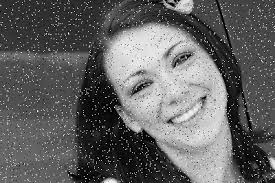

In [ ]:
img1 = "/content/drive/MyDrive/Colab Notebooks/Noise Reduction/girl_noisy_image.jpeg"
Image.open(img1)

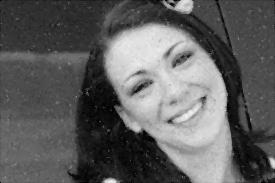

In [ ]:
img2 = "/content/drive/MyDrive/Colab Notebooks/Noise Reduction/filt_girl_noisy_image.jpeg"
Image.open(img2)

Applying `threshold()` to the noisy image mentioned above.

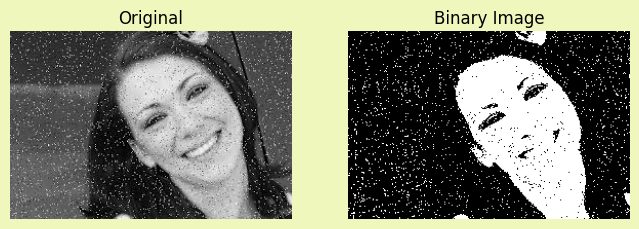

In [ ]:
original, bin_image = threshold(img1)
show_images(original, bin_image)

The original image includes significant **salt-and-pepper noise**. When thresholded, this noise is also **binarized**, producing many unwanted white and black dots in the output. This highlights how thresholding alone is sensitive to **noise and can amplify it**.

Applying `threshold()` to **denoised** image.

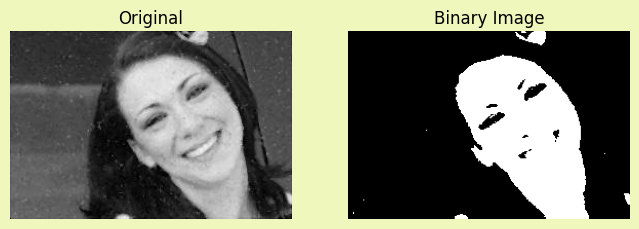

In [ ]:
original, bin_image = threshold(img2)
show_images(original, bin_image)

The original image contains **minimal noise**, allowing the binary thresholding to cleanly separate the foreground (face) from the background. The resulting binary image is **sharp and well-defined**, with fewer false **white/black** spots.

Applying `threshold()` to other images.

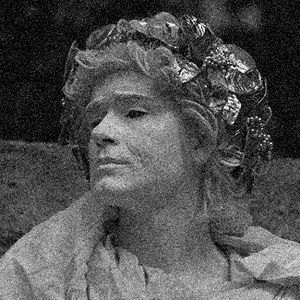

In [ ]:
img3 = "/content/drive/MyDrive/Colab Notebooks/Noise Reduction/sculpt_noisy_image.jpg"
Image.open(img3)

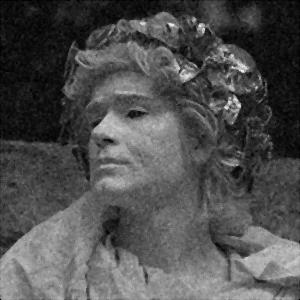

In [ ]:
img4 = "/content/drive/MyDrive/Colab Notebooks/Noise Reduction/filt_sculpt_noisy_image.jpg"
Image.open(img4)

Applying `threshold()` to **noisy image**.

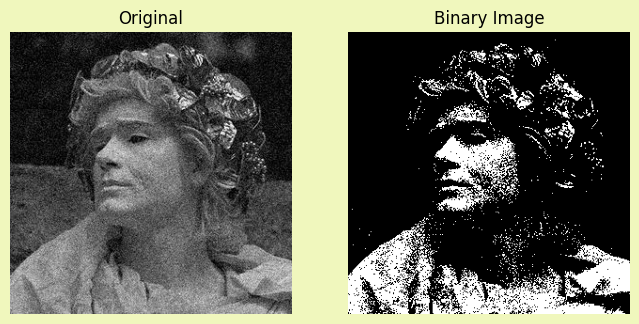

In [ ]:
original, bin_image = threshold(img3)
show_images(original, bin_image)

Applying `threshold()` to the **denoised** version of the previous image.

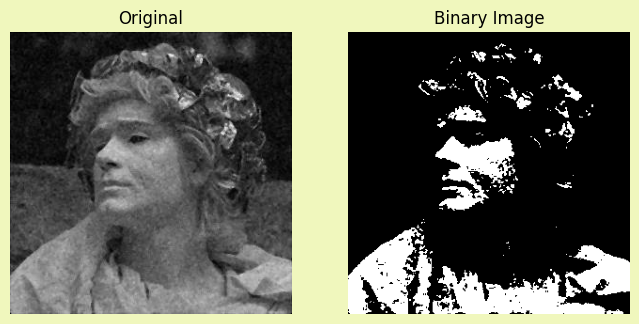

In [ ]:
original, bin_image = threshold(img4)
show_images(original, bin_image)